In [1]:
import os #allows us to access the dataset we will load in the dataset
import pandas as pd #the data manipulation library we will be using
import numpy as np #allows us to do numerical computing
import matplotlib.pyplot as plt #allow us to visualize our data
import seaborn as sns #allows for more advanced visualizations

In [2]:
# load in kaggle dataset through command line
# ! an exclamation point means you are running a command on notebook
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

# the above command will download the dataset called from "username/datasetName"
# and will unzip those files in collab for us to use

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 149M/149M [00:07<00:00, 23.2MB/s]
100% 149M/149M [00:07<00:00, 20.2MB/s]


In [3]:
# create a dataframe with designated paths to each type of brain tumor
# gets the metadata from the training/testing path to store in dataframe
def get_class_paths(path): # path is the directory for the dataset
  classes = []
  class_paths = []

  # Iterate through directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    # Check if it's a directory
    if os.path.isdir(label_path):
      # Iterate through images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        # Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)

  # Create a DataFrame with the collected data
  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })
  return df

In [4]:
# within colab path is always "/content/.../..."
train_df = get_class_paths("/content/Training")

In [5]:
train_df

Class Path       Class
0     /content/Training/meningioma/Tr-me_1245.jpg  meningioma
1     /content/Training/meningioma/Tr-me_0590.jpg  meningioma
2     /content/Training/meningioma/Tr-me_0153.jpg  meningioma
3     /content/Training/meningioma/Tr-me_0130.jpg  meningioma
4     /content/Training/meningioma/Tr-me_0024.jpg  meningioma
...                                           ...         ...
5707   /content/Training/pituitary/Tr-pi_1392.jpg   pituitary
5708   /content/Training/pituitary/Tr-pi_1049.jpg   pituitary
5709   /content/Training/pituitary/Tr-pi_0248.jpg   pituitary
5710   /content/Training/pituitary/Tr-pi_0790.jpg   pituitary
5711   /content/Training/pituitary/Tr-pi_0477.jpg   pituitary

[5712 rows x 2 columns]

In [6]:
test_df = get_class_paths("/content/Testing")

In [7]:
test_df

Class Path       Class
0      /content/Testing/meningioma/Te-me_0208.jpg  meningioma
1      /content/Testing/meningioma/Te-me_0151.jpg  meningioma
2      /content/Testing/meningioma/Te-me_0046.jpg  meningioma
3      /content/Testing/meningioma/Te-me_0112.jpg  meningioma
4      /content/Testing/meningioma/Te-me_0034.jpg  meningioma
...                                           ...         ...
1306    /content/Testing/pituitary/Te-pi_0140.jpg   pituitary
1307    /content/Testing/pituitary/Te-pi_0011.jpg   pituitary
1308    /content/Testing/pituitary/Te-pi_0269.jpg   pituitary
1309  /content/Testing/pituitary/Te-piTr_0007.jpg   pituitary
1310    /content/Testing/pituitary/Te-pi_0215.jpg   pituitary

[1311 rows x 2 columns]

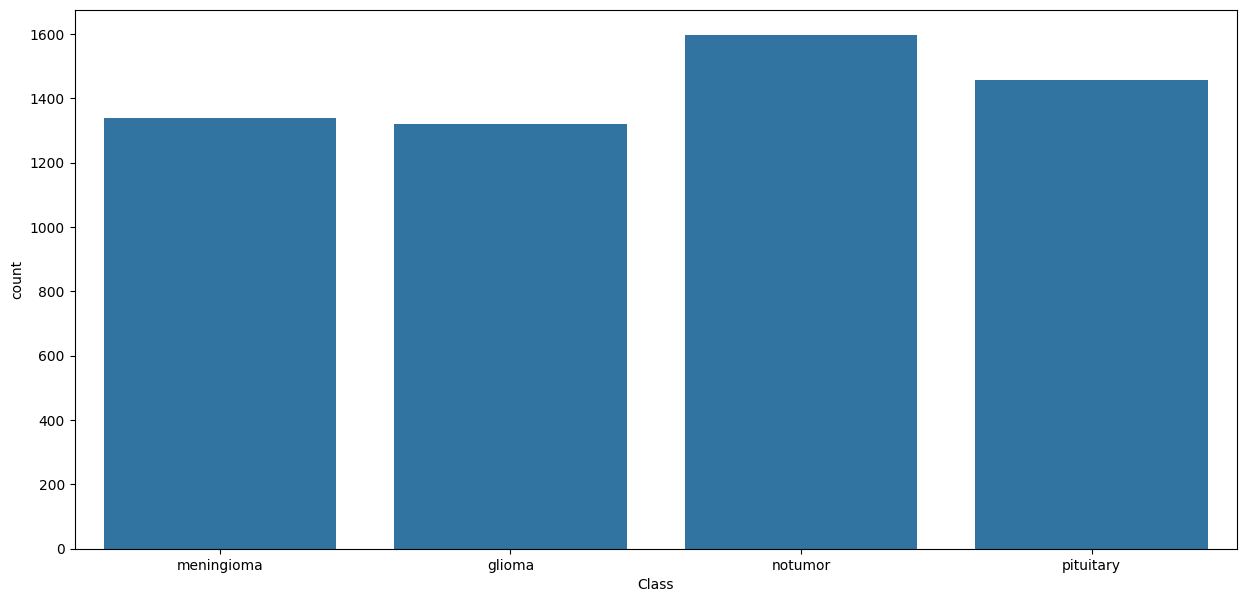

In [8]:
# Display plot of count of images in each class
# this is a very balanced dataset meaning there are roughly the same number of
# mris for each class type
plt.figure(figsize=(15,7))
ax = sns.countplot(data=train_df, x=train_df['Class'])

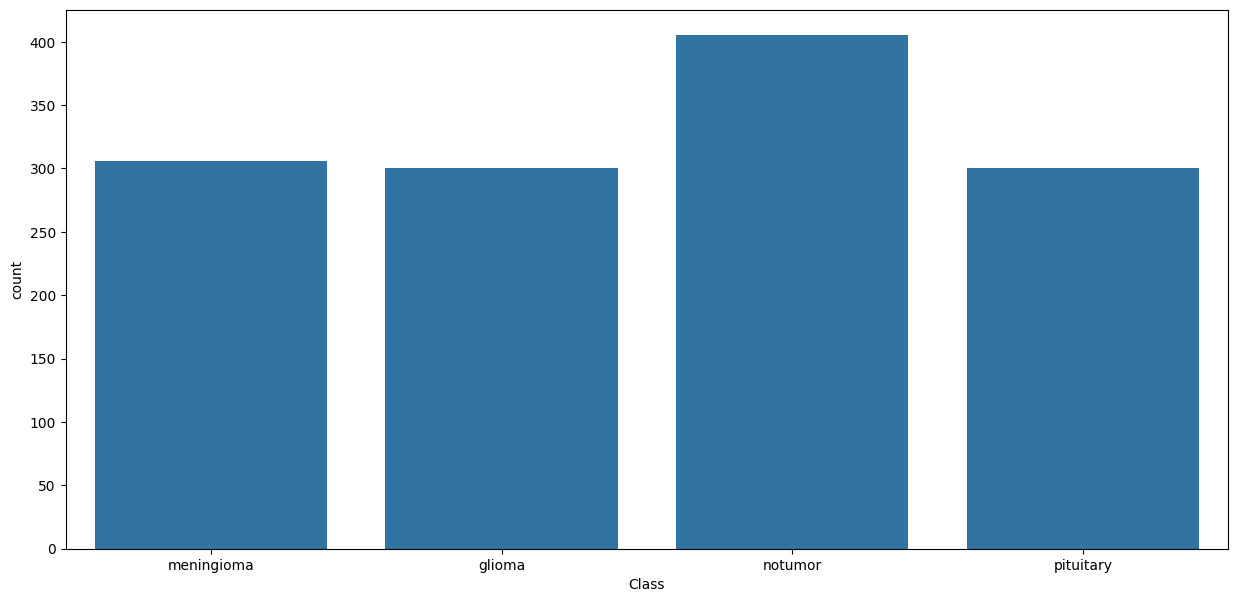

In [9]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=test_df, x=test_df["Class"])

In [10]:
# split data into 3: Training data, Testing data, Validation Data
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix # evaluate performance of the model
import tensorflow as tf
from tensorflow.keras.models import Sequential # allows us to build a model layer by layer
from tensorflow.keras.layers import Dense, Dropout, Flatten #layers, optimizers, and metrics used to train the model
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# split testing data set into testing and validation
# necessary for tuning and to preventing overfitting
valid_df, test_df = train_test_split(test_df, train_size=0.5, stratify=test_df["Class"])
''' train_test_split(
      datasetBeingSplit,
      train_size=0.5 => this defines the size of each split 0.5 means it will split equally in half
      stratify=test_df => this is telling the program to make sure that each split is
                  proportionally the same in each class in comparison to the other split
    )
    '''

' train_test_split(\n      datasetBeingSplit,\n      train_size=0.5 => this defines the size of each split 0.5 means it will split equally in half\n      stratify=test_df => this is telling the program to make sure that each split is\n                  proportionally the same in each class in comparison to the other split\n    )\n    '

In [12]:
print("VALIDATE DATAFRAME")
valid_df

VALIDATE DATAFRAME


Class Path       Class
973      /content/Testing/notumor/Te-no_0393.jpg     notumor
575       /content/Testing/glioma/Te-gl_0085.jpg      glioma
440       /content/Testing/glioma/Te-gl_0088.jpg      glioma
452       /content/Testing/glioma/Te-gl_0224.jpg      glioma
681      /content/Testing/notumor/Te-no_0185.jpg     notumor
...                                          ...         ...
833      /content/Testing/notumor/Te-no_0170.jpg     notumor
1213   /content/Testing/pituitary/Te-pi_0202.jpg   pituitary
138   /content/Testing/meningioma/Te-me_0115.jpg  meningioma
188   /content/Testing/meningioma/Te-me_0167.jpg  meningioma
1126   /content/Testing/pituitary/Te-pi_0061.jpg   pituitary

[655 rows x 2 columns]

In [13]:
print("TEST DATAFRAME")
test_df

TEST DATAFRAME


Class Path       Class
1265  /content/Testing/pituitary/Te-piTr_0006.jpg   pituitary
1066    /content/Testing/pituitary/Te-pi_0076.jpg   pituitary
287    /content/Testing/meningioma/Te-me_0269.jpg  meningioma
311        /content/Testing/glioma/Te-gl_0087.jpg      glioma
111    /content/Testing/meningioma/Te-me_0022.jpg  meningioma
...                                           ...         ...
995       /content/Testing/notumor/Te-no_0289.jpg     notumor
129    /content/Testing/meningioma/Te-me_0239.jpg  meningioma
130    /content/Testing/meningioma/Te-me_0052.jpg  meningioma
144    /content/Testing/meningioma/Te-me_0126.jpg  meningioma
926       /content/Testing/notumor/Te-no_0144.jpg     notumor

[656 rows x 2 columns]

# Preprocessing the Data


In [14]:
# Batch size is the number of images the model will process at once
batch_size = 32 #common batch sizes 16, 32, 64, 128  ==> EXPERIMENT WITH DIFFERENT SIZES

# resize all images are the same size to rmv the descrepency probability
img_size = (299, 299)

# rescale the pixel values and adjusting their brightness to help model be more robust and generalized to more data
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

# need to have a separate image generator for test data to make sure
# any generalizations made during training are correct in testing w/o changes
test_gen = ImageDataGenerator(rescale=1/255)


In [15]:
# Create Training Data Flow
train_gen = image_generator.flow_from_dataframe(train_df,
                                                x_col="Class Path",
                                                y_col="Class",
                                                batch_size=batch_size,
                                                target_size=img_size
                                                )
# Create Validation Data Flow
valid_gen = image_generator.flow_from_dataframe(valid_df,
                                                x_col="Class Path",
                                                y_col="Class",
                                                batch_size=batch_size,
                                                target_size=img_size
                                                )

# Create Testing Data Flow
test_gen = test_gen.flow_from_dataframe(test_df,
                                        x_col="Class Path",
                                        y_col="Class",
                                        batch_size=16, # smaller batch size to set model up for success during testing
                                        target_size=img_size,
                                        shuffle=False #want order of the data to remain consistent
                                        )

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


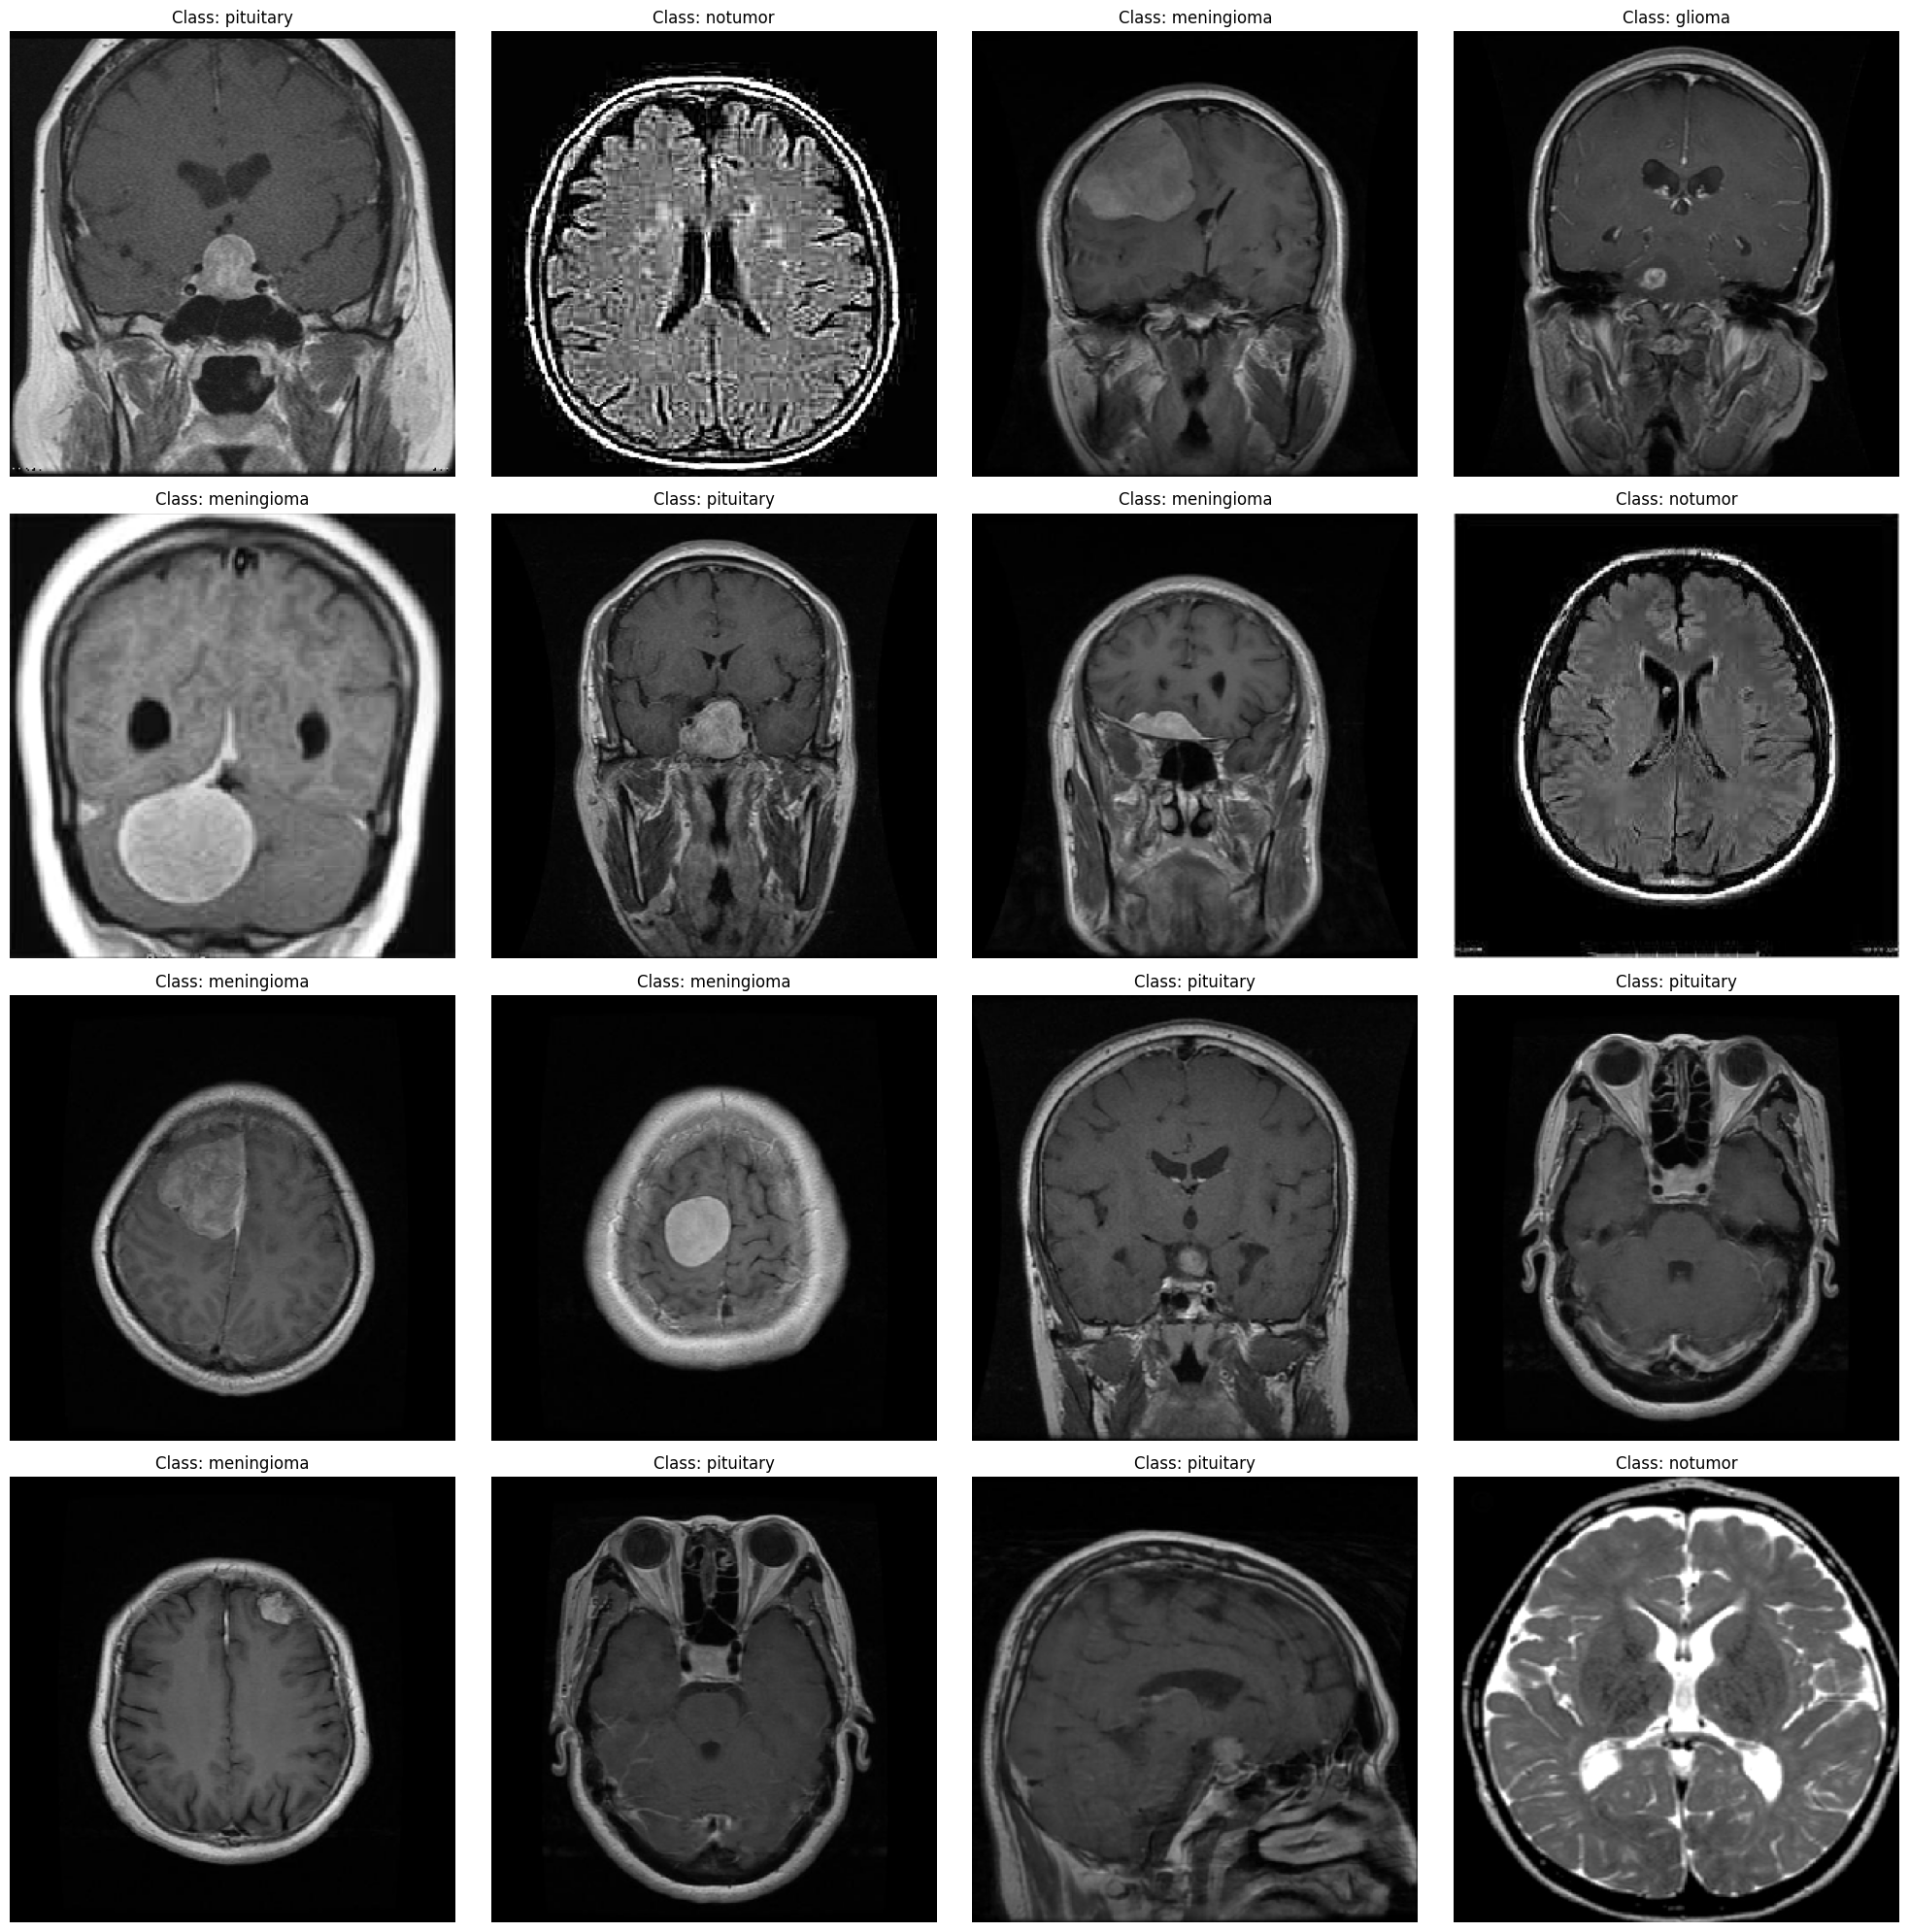

In [16]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4,4,i+1)
  batch = next(train_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  # Get the class index
  class_index = np.argmax(label)

  #Get the list of class names and class indices
  class_names = list(train_gen.class_indices.keys())
  class_indices = list(train_gen.class_indices.values())

  #Find the index of the class_index in the list of indices
  index_position = class_indices.index(class_index)

  #Get the class name using the index position
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')
plt.tight_layout()
plt.show()

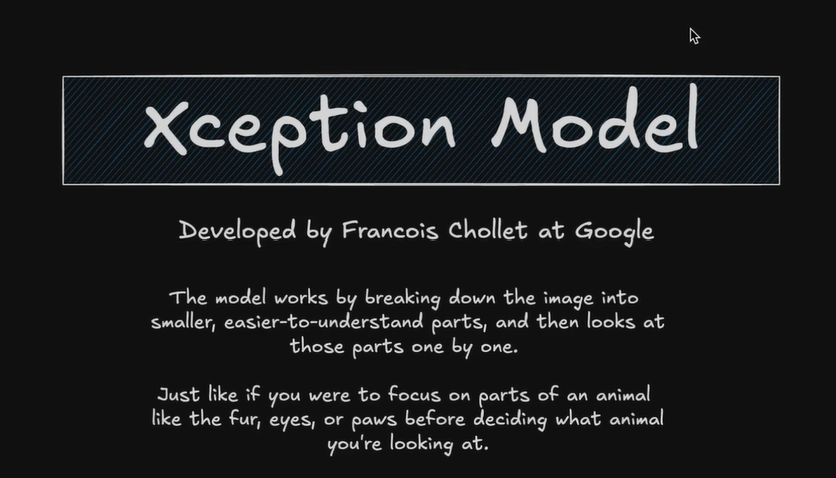

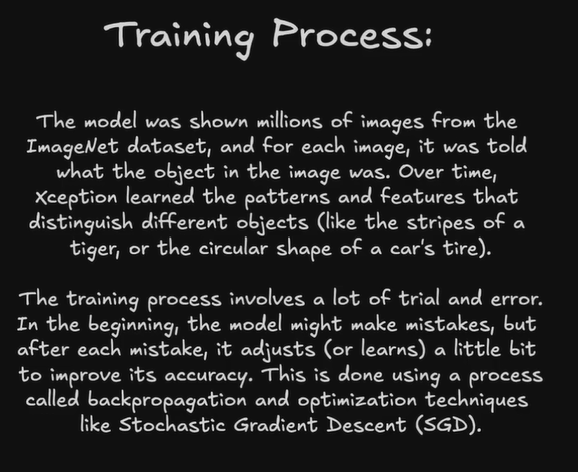

This is a Neural networking model that utilizes image recognition. By breaking down the image into smaller and smaller parts.

*It was trained on ImageNet

# Transfer Learning

Adapting a larger pretrained model to a new task

*For this project the model trained by ImageNet is getting adapted to classify brain tumors

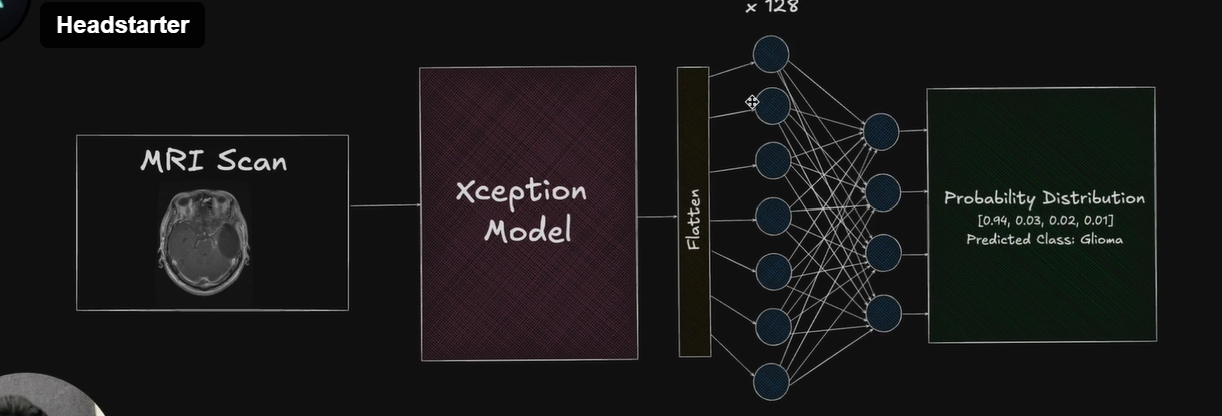

1. Retrieve our input, the MRI scan
2. Put input through the [Xception model](https://keras.io/2.17/api/applications/xception/) that will use smart filters to process through the input and identify the key features (i.e fatty tissue, tumor type, etc)
3. After going through the model the information we get back is a tensor (a multidimensional array of data that can be used to represent and organize data) => housing all the key features identified in the model
4. To use the tensor we need to "Flatten" the tensor into a 1-dimensional array => multiple arrays become a single array

In [17]:
img_shape = (299, 299, 3) #(width, height, # of color channels)
# these images are in rgb format meaning they have 3 color channels

base_model = tf.keras.applications.Xception(
    include_top = False, #using pretrained extraction layers but also using our own classifications
    weights = "imagenet", # we are using the weights pretrained in the model from imagenet
    input_shape = img_shape, # only needs to be set when 'include_top' is False
    pooling = 'max' # looks at small sections one at a time and keeps the most important/crucial details
    # smart summarization with key features
    # pooling is an optional component when 'include_top' is False
)

#Define our full model using the base_model defined earlier
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3), # drop neurons based on the previous flatten() layer
    Dense(128, activation="relu"), # relu is a fcn that helps model learn non-linear relationships b/w input and output
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Dropout() Layer
*   Prevents overfitting
    - when the model learns the training dataset TOO well and starts to function poorly on new/unseen data
*   Will randomly drop neurons in the model during training to help the model generalize better/new data

### Dense(# of neurons, activation fcn) Layer
- Common in the lase Dense() Layer:
  - # of neurons = # of classes
  - 'softmax' activation
    - takes the output from the last layer and transforms it into a probability prediction for each layer
      - The sum of the probabilities is 100%
      - the highest probability is the prediction class
      




In [18]:
# FINAL STEP in building the model and getting it ready for training
# Compile the model
model.compile(Adamax(learning_rate=0.001), # 0.001 is a good starting learning rate
              loss = 'categorical_crossentropy', # finding the lowest loss for the model based on provided loss function
              metrics = ['accuracy',
                         Precision(),
                         Recall()])

#### Adamax
- An adaptive guide/learning assistant for the model
  - learning_rate [rate is traversed across the loss fcn in image below]
    - smll learning rate = slow training + more indepth & accurate knowledge
      - could take a long time to converge on the correct solution
      - higher cost
    - larger learning rate = faster training + shallow % less accurate knowledge base
      - can also cause the model to overshoot the actual weights and never converge on a good solution
      - lower cost
  - Loss = diff. b/w predicted output and actual output
    - 'categorical_crossentropy' penalizes the model more
heavily for incorrect predictions
      - returns loss % (want to aim for a low loss amt)
  - Metrics (tracked by model)
    - accuracy = % of correct predictions
    - Precision() = % of true positives
    - Recall() = % of true positives that were correctly predicted

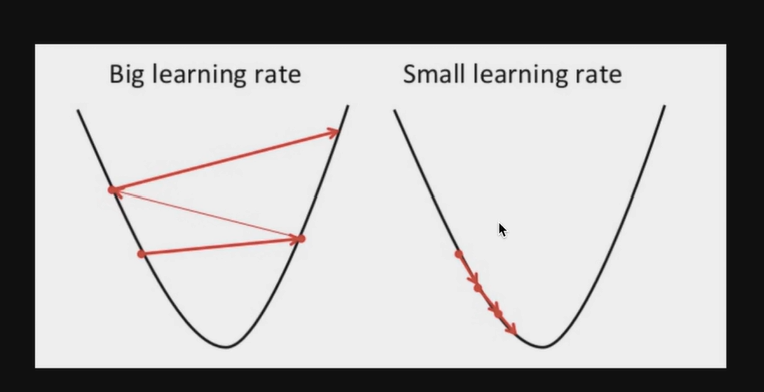

In [19]:
hist = model.fit(train_gen, epochs=6, validation_data=valid_gen)
# epochs=5 => the model will go through the training data set 5 times
# & will adjust its weights based on the loss and metrics we set earlier

Epoch 1/6


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.5824 - loss: 1.0521 - precision: 0.7322 - recall: 0.3838 - val_accuracy: 0.8702 - val_loss: 0.4522 - val_precision: 0.8826 - val_recall: 0.8611
Epoch 2/6
179/179 ━━━━━━━━━━━━━━━━━━━━ 157s 777ms/step - accuracy: 0.9588 - loss: 0.1104 - precision: 0.9639 - recall: 0.9562 - val_accuracy: 0.9298 - val_loss: 0.2044 - val_precision: 0.9296 - val_recall: 0.9267
Epoch 3/6
179/179 ━━━━━━━━━━━━━━━━━━━━ 139s 769ms/step - accuracy: 0.9812 - loss: 0.0532 - precision: 0.9826 - recall: 0.9784 - val_accuracy: 0.9756 - val_loss: 0.0846 - val_precision: 0.9755 - val_recall: 0.9710
Epoch 4/6
179/179 ━━━━━━━━━━━━━━━━━━━━ 140s 770ms/step - accuracy: 0.9936 - loss: 0.0214 - precision: 0.9946 - recall: 0.9934 - val_accuracy: 0.9649 - val_loss: 0.1199 - val_precision: 0.9649 - val_recall: 0.9649
Epoch 5/6
179/179 ━━━━━━━━━━━━━━━━━━━━ 145s 803ms/step - accuracy: 0.9928 - loss: 0.0206 - precision: 0.9937 - recall: 0.9928 - val_accuracy: 0.9924 - val_loss: 

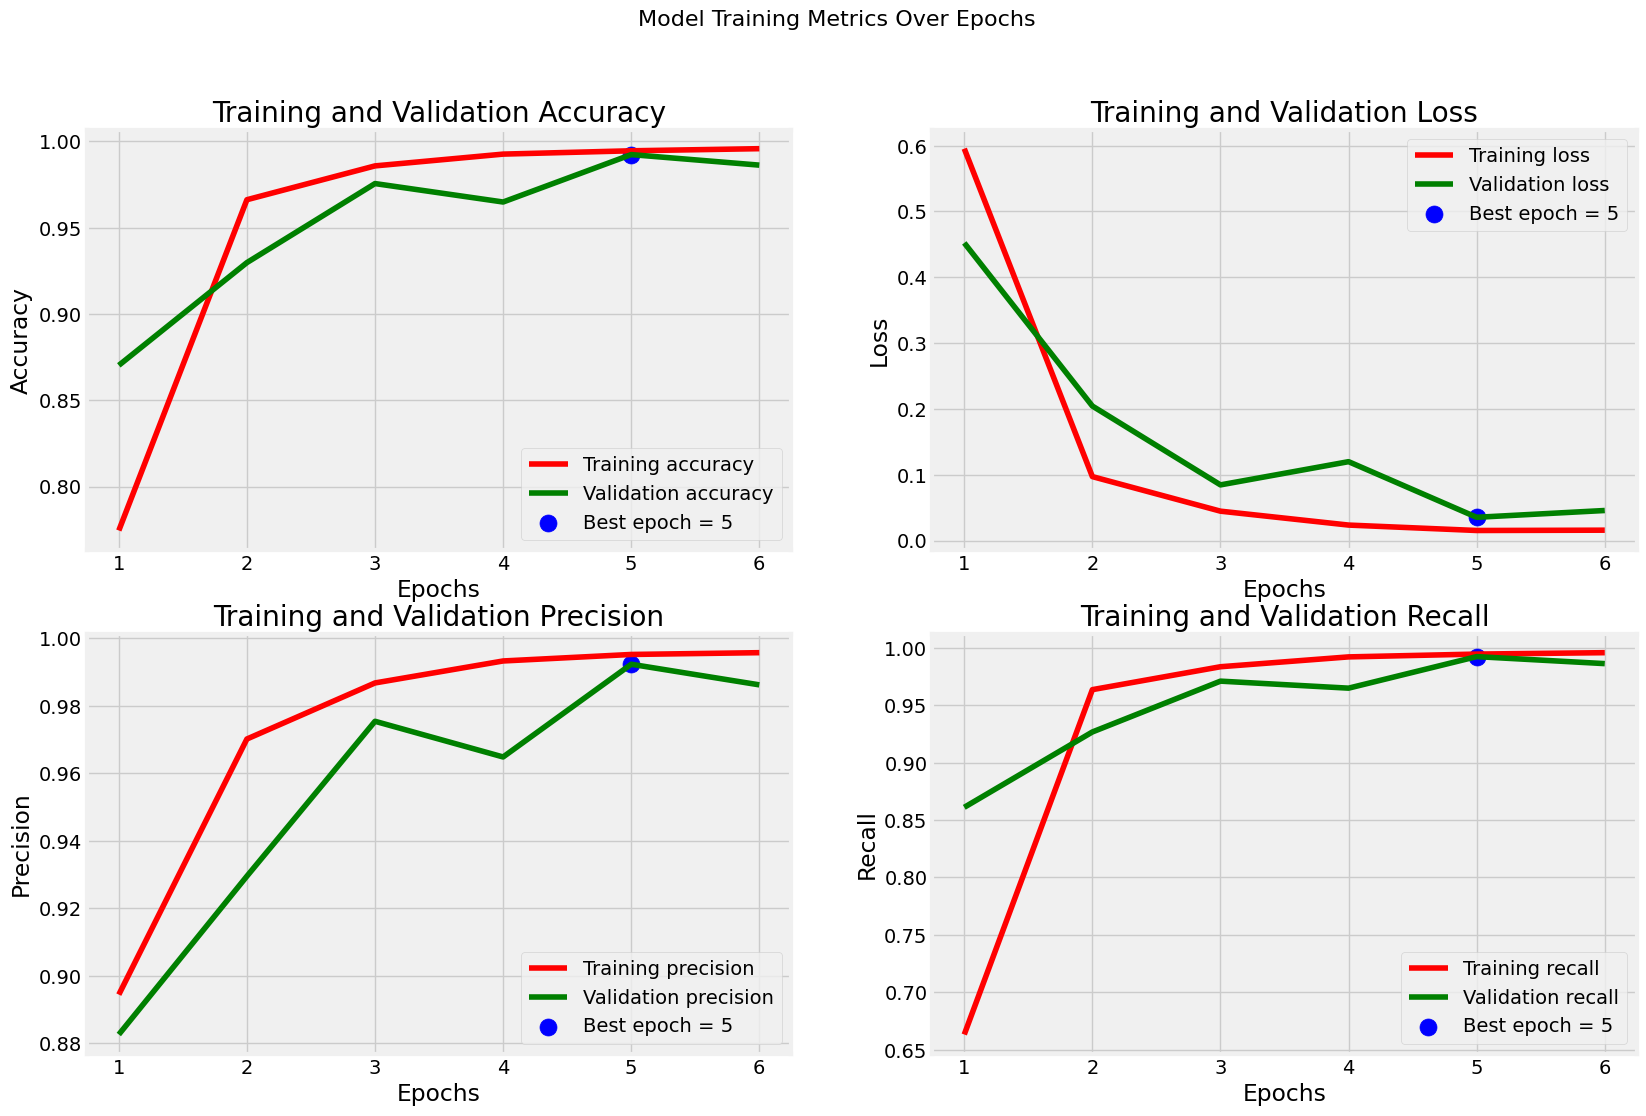

In [20]:
#Visualize the training metrics of each epoch

# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
train_metrics = {m: hist.history[m] for m in metrics}
validation_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
# Find lowest loss in our training history/when it made the least amt of mistakes
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(validation_metrics[m])
  else:
    idx = np.argmax(validation_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = validation_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

# Create 4 plots
# Model Accuracy over time, Model Loss over time, Model Precision, Model Recall
for i, metric in enumerate(metrics, 1):
  plt.subplot(2,2,i)
  epochs = range(1, len(train_metrics[metric]) + 1)

  plt.plot(epochs, train_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, validation_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {best_epochs[metric]}')
  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [21]:
# Evaluate Model on all datasets [Training, Test, Validation]
# evaluating model based on data it knows and trained on
train_score = model.evaluate(train_gen, verbose=1) # How well model learned patterns, etc.
# helps verify if model is generalizing well since we used it to track
# the models accuracy during training but the model never actually learned this data
validation_score = model.evaluate(valid_gen, verbose=1) # If training process was effective
# true measure of models performance since this is completely new and unseen data
test_score = model.evaluate(test_gen, verbose=1) # How model will perform realistically in production

# verbose=1 means the model will provide a progress bar and detailed metrics as the model runs

print(f'Train Accuracy: {train_score[1]*100:.2f}%')
print(f'Train Loss: {train_score[0]:.4f}')
print(f"\n\nValidation Accuracy: {validation_score[1]*100:.2f}%")
print(f'Validation Loss: {validation_score[0]:.4f}')
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f'Test Loss: {test_score[0]:.4f}')

179/179 ━━━━━━━━━━━━━━━━━━━━ 43s 239ms/step - accuracy: 0.9981 - loss: 0.0039 - precision: 0.9981 - recall: 0.9981
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - accuracy: 0.9874 - loss: 0.0453 - precision: 0.9873 - recall: 0.9865
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 1.0000 - loss: 0.0044 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.9929 - loss: 0.0297 - precision: 0.9929 - recall: 0.9929
Train Accuracy: 99.91%
Train Loss: 0.0021


Validation Accuracy: 98.78%
Validation Loss: 0.0445


Test Accuracy: 99.09%
Test Loss: 0.0266


41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step


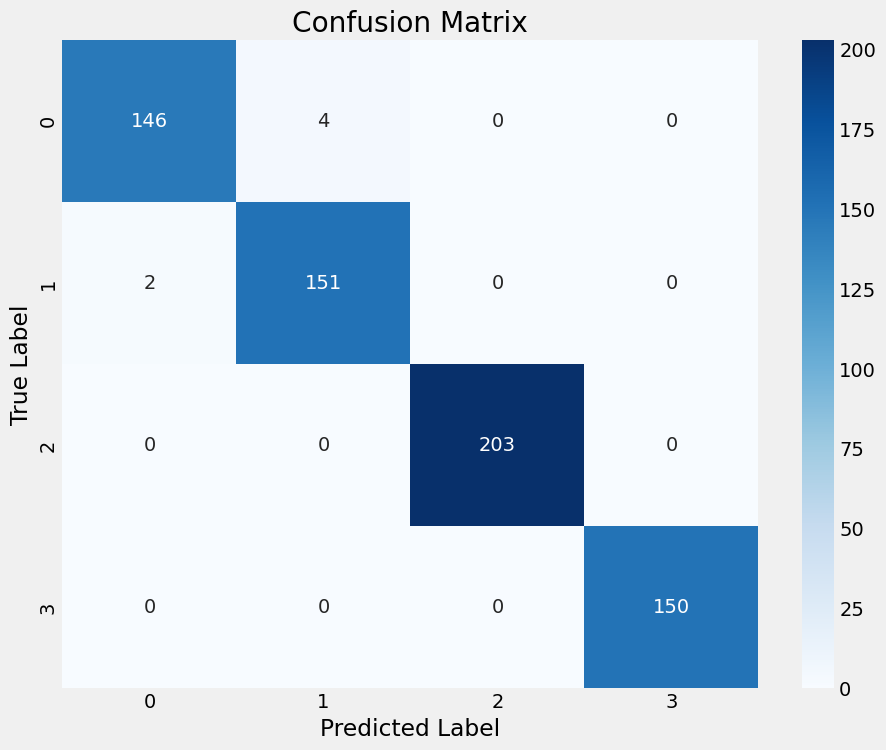

In [22]:
# Visualize how well the model does for each class
preds = model.predict(test_gen) # asking model to make predictions on the mri scans in testing dataset
# output probabilities are how confident the model is that the mri fits into each class
y_pred = np.argmax(preds, axis=1) # convert probability into actual predictions
# picks class the model is most confident about

# map class names to numerical indices
class_dict = {
    0: 'glinoma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

#Then create and display the confusion matrix
# Confusion Matrix: shows us exactly where model succeeds and fails
cm = confusion_matrix(test_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label") #what model thought the mri was
plt.ylabel("True Label") # what it actually was
plt.title('Confusion Matrix')
plt.show()

# for the plot itself
# #'s on the diagonal are what the model got right
# #'s off the diagnol are what the model got wrong
# we want higher numbers on the diagonal and lower numbers elsewhere

# this data can be used to see which labels are most commonly being mixed for the model

In [23]:
# Create function to visualize the predictions on provided test image
from PIL import Image

# Takes in an MRI scan and returns two things
# 1. the original image
# 2. A bar chart showing the probability the MRI is each class
# also includes a response of the predicted tumor type
def predict(img_path: str) -> None:
  # Get class labels (tumor types)
  labels = list(class_dict.keys())

  # Create figure
  plt.figure(figsize=(6, 8))

  # Load and preprocess image
   #(make image the same size as images used for training)
  img = Image.open(img_path)
  resized_img = img.resize( (299, 299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  # Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions [0])

  # Get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  # Plot original image
  plt.subplot(2, 1, 1)
  plt.imshow (resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  # Plot prediction probabilities
  plt.subplot (2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Class Probabilities")

  # Add probability labels to bars

  ax = plt.gca()

  ax.bar_label(bars, fmt="%.2f")
  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


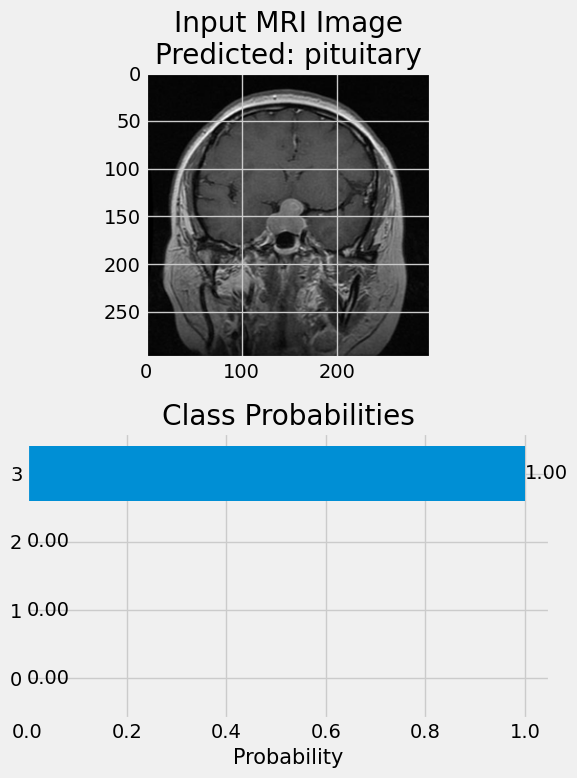


Predicted tumor type: pituitary


In [24]:
predict("/content/Testing/pituitary/Te-piTr_0001.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


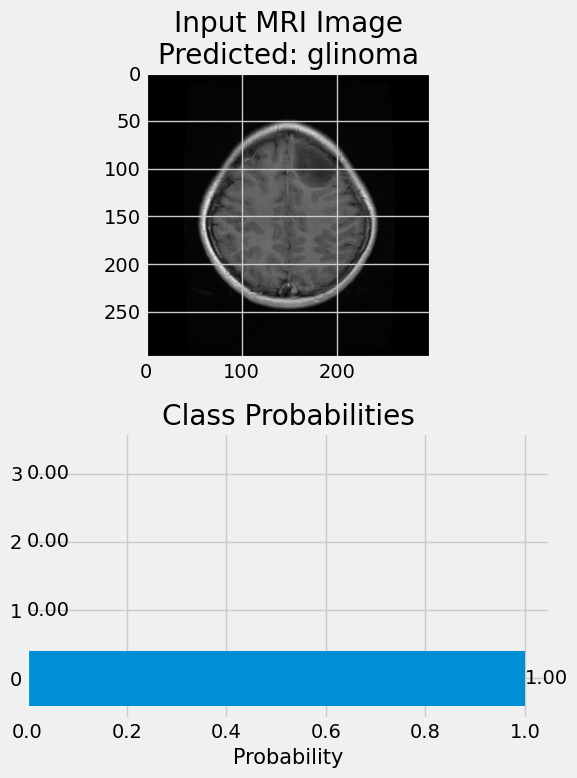


Predicted tumor type: glinoma


In [25]:
predict("/content/Testing/glioma/Te-glTr_0005.jpg")

In [26]:
model.save_weights("xception_model.weights.h5")

# Convulutional Neural Network (CNN)
- use convolution operation to analyze patterns in images

** Goal: is to train a smaller CNN model to use
- cheaper to deploy (less parameters and layers meaning less computing power needed)

### Main Layers
1. Convulutional Layer (ie Conv2D)
2. MaxPooling Layer
3. Dropout() Layer

**Another potential layer is BatchNormalization()
- improves the stability and speed of training the neuros

### To Test Performance:
- Add/remove layers
- Change # of filters
  - '#' of filters either increase of decrease by the power of 2 through each block
  EX. [32, 64, 128, 64, 32]

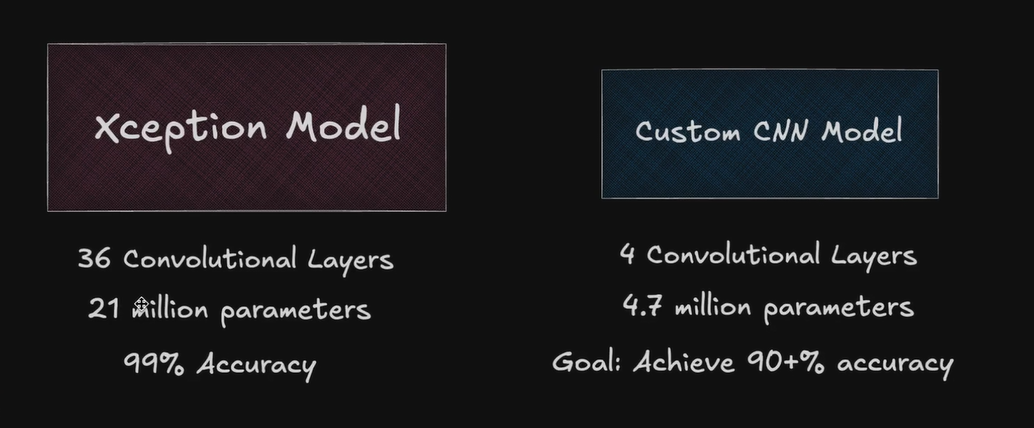

In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import regularizers

In [15]:
# Batch size is the number of images the model will process at once
batch_size = 16
img_size = (224, 224)
#both of the above reduce the memory usage needed

# rescale the pixel values and adjusting their brightness to help model be more robust and generalized to more data
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

test_gen = ImageDataGenerator(rescale=1/255)

# Create Training Data Flow
train_gen = image_generator.flow_from_dataframe(train_df,
                                                x_col="Class Path",
                                                y_col="Class",
                                                batch_size=batch_size,
                                                target_size=img_size
                                                )
# Create Validation Data Flow
valid_gen = image_generator.flow_from_dataframe(valid_df,
                                                x_col="Class Path",
                                                y_col="Class",
                                                batch_size=batch_size,
                                                target_size=img_size
                                                )

# Create Testing Data Flow
test_gen = test_gen.flow_from_dataframe(test_df,
                                        x_col="Class Path",
                                        y_col="Class",
                                        batch_size=16,
                                        target_size=img_size,
                                        shuffle=False #want order of the data to remain consistent
                                        )

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [16]:
# Create a Sequential model
cnn_model = Sequential()

# Convolutional layers
# Create 4 Convolutional Blocks
# each block has a different number of convolutional filters
# Filters extract features like edges, shapes, textures, etc.
cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2))) # focuses the model on most important features and reduces the # of parameters

# more complex patterns based on first block of filters
cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax'))
# Output layer with 4 neurons for the 4 classes

# Compile the model
cnn_model.compile(Adamax(learning_rate = 0.001),
                  loss='categorical_crossentropy',
                  metrics= ['accuracy', Precision(), Recall()])

# Display the model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 512)       │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 256)       │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,0

 Total params: 4,780,484 (18.24 MB)

 Trainable params: 4,778,052 (18.23 MB)

 Non-trainable params: 2,432 (9.50 KB)

In [17]:
#Train model
history = cnn_model.fit(train_gen, epochs=8, validation_data=valid_gen)

Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 164s 375ms/step - accuracy: 0.6989 - loss: 5.1826 - precision: 0.7229 - recall: 0.6524 - val_accuracy: 0.2290 - val_loss: 13.2136 - val_precision: 0.2290 - val_recall: 0.2290
Epoch 2/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 117s 328ms/step - accuracy: 0.8243 - loss: 2.8468 - precision: 0.8432 - recall: 0.8002 - val_accuracy: 0.6763 - val_loss: 2.5802 - val_precision: 0.7276 - val_recall: 0.6443
Epoch 3/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 329ms/step - accuracy: 0.8467 - loss: 1.9210 - precision: 0.8618 - recall: 0.8250 - val_accuracy: 0.5710 - val_loss: 2.3497 - val_precision: 0.5848 - val_recall: 0.5527
Epoch 4/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 330ms/step - accuracy: 0.8850 - loss: 1.3487 - precision: 0.9002 - recall: 0.8743 - val_accuracy: 0.7542 - val_loss: 1.5957 - val_precision: 0.7691 - val_recall: 0.7221
Epoch 5/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 330ms/step - accuracy: 0.8962 - loss: 1.0456 - precision: 0.9066 - recall: 0.8850 - val_accuracy: 0.6443 - val_lo

In [18]:
print(history.history.keys()) # verify the key/metric names to use in next step

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])


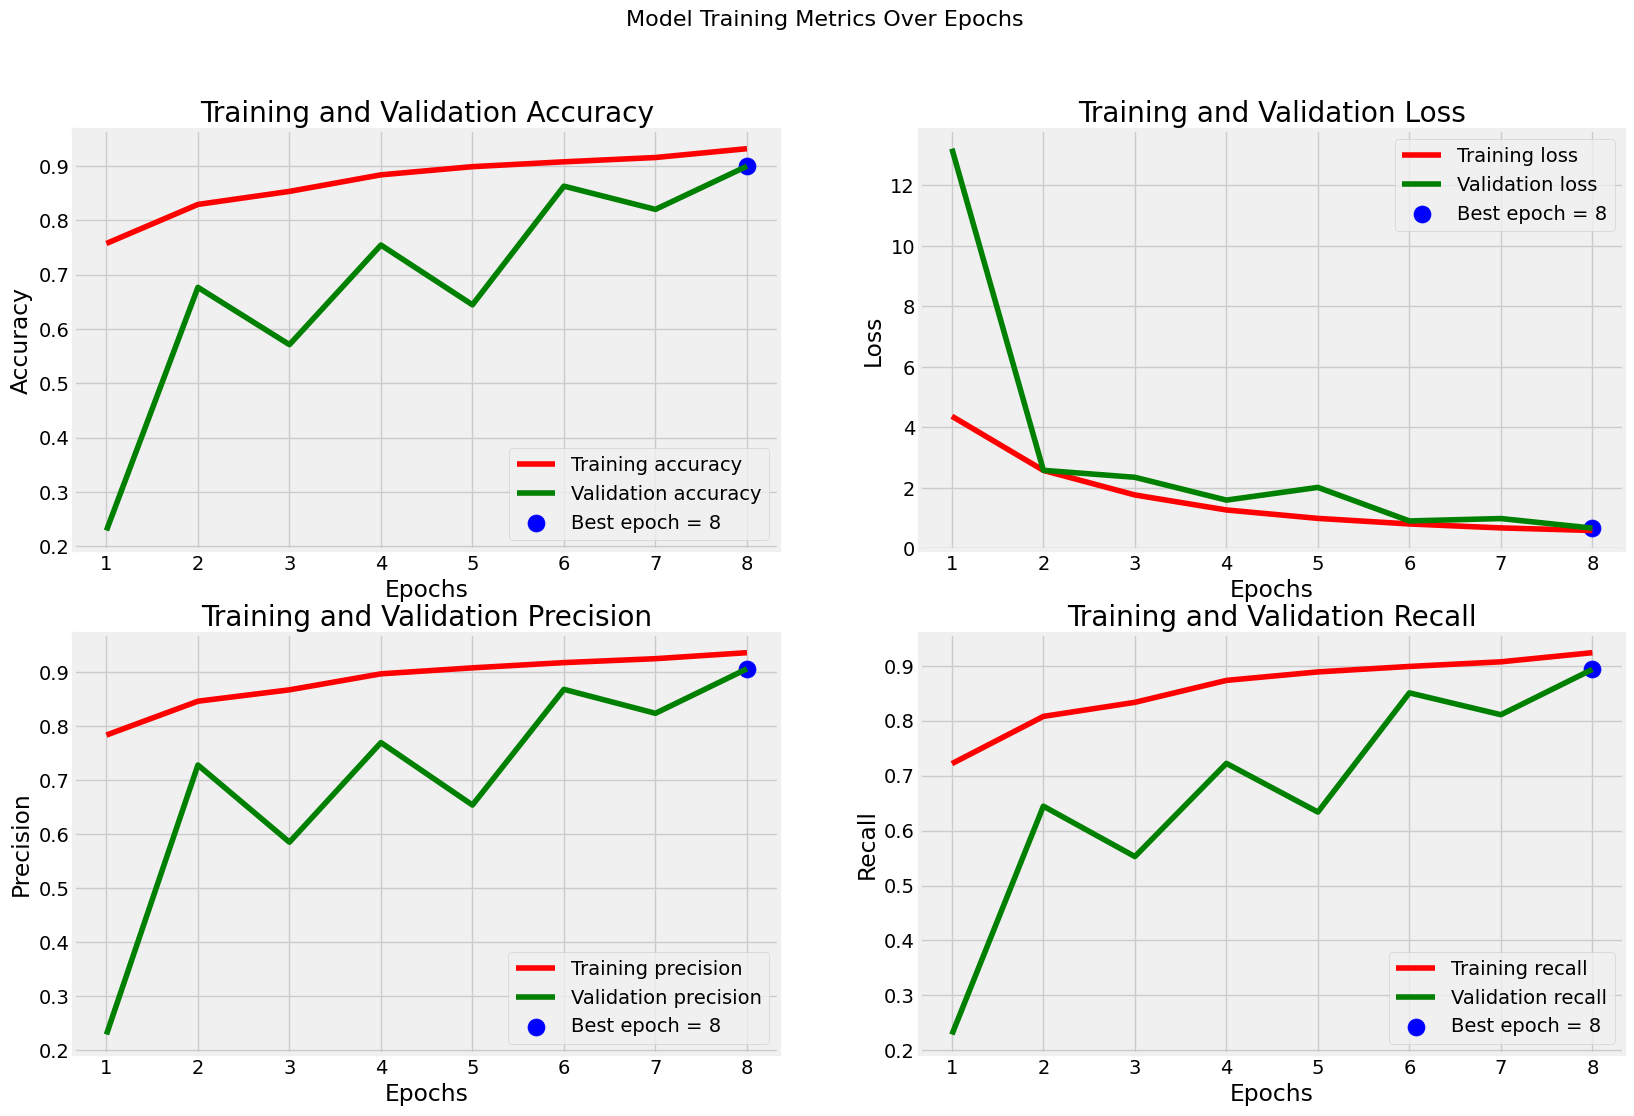

In [19]:
#Visualize the training metrics of each epoch

# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
train_metrics = {m: history.history[m] for m in metrics}
validation_metrics = {m: history.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
# Find lowest loss in our training history/when it made the least amt of mistakes
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(validation_metrics[m])
  else:
    idx = np.argmax(validation_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = validation_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

# Create 4 plots
# Model Accuracy over time, Model Loss over time, Model Precision, Model Recall
for i, metric in enumerate(metrics, 1):
  plt.subplot(2,2,i)
  epochs = range(1, len(train_metrics[metric]) + 1)

  plt.plot(epochs, train_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, validation_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {best_epochs[metric]}')
  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [20]:
train_score = cnn_model.evaluate(train_gen, verbose=1) # How well model learned patterns, etc.
validation_score = cnn_model.evaluate(valid_gen, verbose=1) # If training process was effective
test_score = cnn_model.evaluate(test_gen, verbose=1) # How model will perform realistically in production

print(f'Train Accuracy: {train_score[1]*100:.2f}%')
print(f'Train Loss: {train_score[0]:.4f}')
print(f"\n\nValidation Accuracy: {validation_score[1]*100:.2f}%")
print(f'Validation Loss: {validation_score[0]:.4f}')
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f'Test Loss: {test_score[0]:.4f}')

357/357 ━━━━━━━━━━━━━━━━━━━━ 29s 80ms/step - accuracy: 0.9585 - loss: 0.4834 - precision: 0.9597 - recall: 0.9573
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.8764 - loss: 0.7034 - precision: 0.8864 - recall: 0.8721
 2/41 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9531 - loss: 0.4710 - precision: 0.9531 - recall: 0.9531 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.9321 - loss: 0.5665 - precision: 0.9370 - recall: 0.9284
Train Accuracy: 96.22%
Train Loss: 0.4756


Validation Accuracy: 90.23%
Validation Loss: 0.6710


Test Accuracy: 92.84%
Test Loss: 0.5976


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step


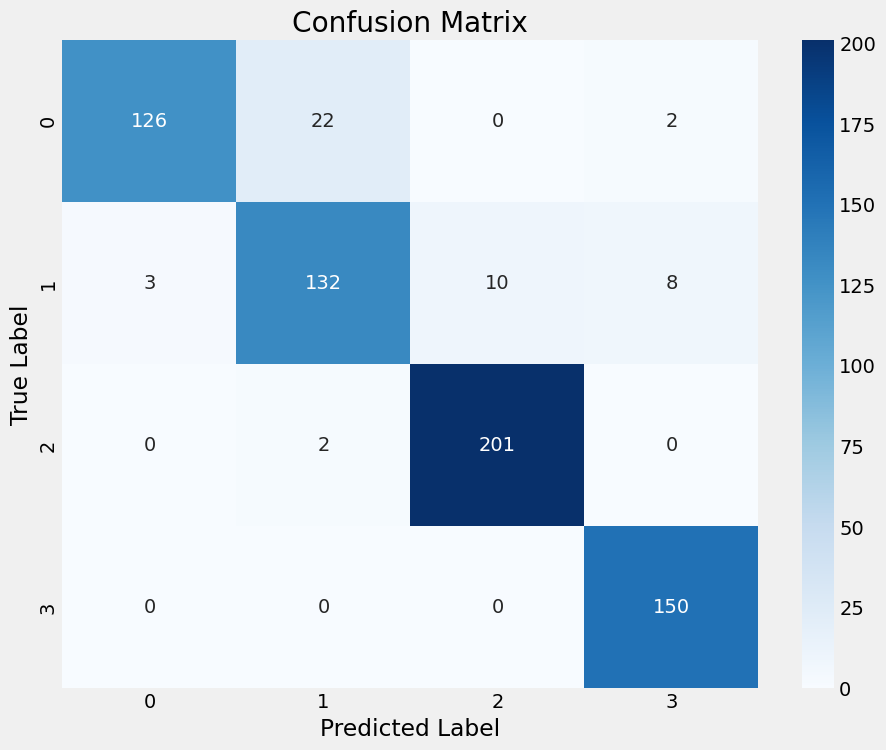

In [21]:
# Visualize how well the model does for each class
preds = cnn_model.predict(test_gen) # asking model to make predictions on the mri scans in testing dataset
# output probabilities are how confident the model is that the mri fits into each class
y_pred = np.argmax(preds, axis=1) # convert probability into actual predictions
# picks class the model is most confident about

# map class names to numerical indices
class_dict = {
    0: 'glinoma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

#Then create and display the confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label") #what model thought the mri was
plt.ylabel("True Label") # what it actually was
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Print classification report
# takes in the true classes for the images vs the predicted classes
clr = classification_report(test_gen.classes, y_pred)
print(clr)

#NOTE:
# EX. for precision, the model is incorrectly identifying
# other tumors as being "no tumor"
# for recall, it is accurately identifying almost all "no tumor" cases
# this could be a problem in the medical field since tumors would take
# longer to be diagnosed

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       150
           1       0.85      0.86      0.85       153
           2       0.95      0.99      0.97       203
           3       0.94      1.00      0.97       150

    accuracy                           0.93       656
   macro avg       0.93      0.92      0.92       656
weighted avg       0.93      0.93      0.93       656



In [23]:
cnn_model.save('cnn_model.h5')